# Example: moon-shaped data using NICE

2020-11-18 first created

In [1]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
from flow import NICE
from utils import *
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
print(tf.__version__)
!python --version

2.3.1
Python 3.7.6


## Settings

In [2]:
inp_dim = 2
n_sample = 1000
n_couple_layer = 5
n_hid_layer = 3
n_hid_dim = 512

n_batch = 128
n_epoch = 2000
n_display = 200

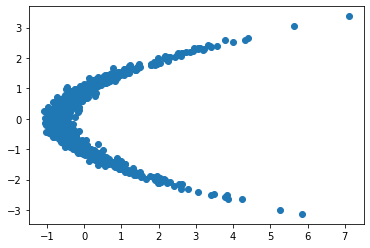

In [3]:
x2 = np.random.normal(0, 4, n_sample)
x1 = np.random.normal(0.25 * x2**2, [1]*n_sample)
X = np.stack([x1, x2], axis=1).astype('float32')
X = StandardScaler().fit_transform(X)
plt.scatter(X[:,0], X[:,1]);

## Initialize the model

In [4]:
model = NICE(inp_dim, n_couple_layer, n_hid_layer, n_hid_dim, name='NICE')
model.build(input_shape=(inp_dim,))
model.summary()

Model: "NICE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer0 (AdditiveCouplingLaye multiple                  264193    
_________________________________________________________________
Layer1 (AdditiveCouplingLaye multiple                  264193    
_________________________________________________________________
Layer2 (AdditiveCouplingLaye multiple                  264193    
_________________________________________________________________
Layer3 (AdditiveCouplingLaye multiple                  264193    
_________________________________________________________________
Layer4 (AdditiveCouplingLaye multiple                  264193    
_________________________________________________________________
ScalingLayer (ScalingLayer)  multiple                  2         
Total params: 1,320,967
Trainable params: 1,320,967
Non-trainable params: 0
____________________________________________________

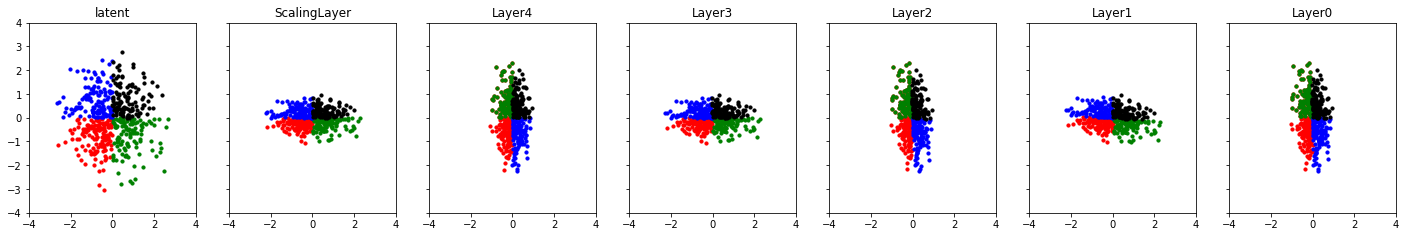

In [5]:
fig = visualize_moon(model, 500, direction='inverse', sharexy=True)

In [6]:
def loss_fun(y_true, y_pred):
    # negative log likelihood
    #  log_prob = -1/2 * prob^2
    #  - log_prob = 1/2 * prob^2
    return tf.math.reduce_sum(0.5 * y_pred **2, axis=-1)

model.compile(loss=loss_fun, optimizer='adam')

## Train the model

In [7]:
%%time
logger = NBatchLogger(n_display, n_epoch)
hist = model.fit(X, X,
                 epochs=n_epoch,
                 steps_per_epoch=1,
                 callbacks=[logger],
                 verbose=0)

=== Started at 2020-11-25 19h:21m:14s ===
 2020-11-25 19h:21m:15s | Epoch: 1/2000 | loss=3.775671
 2020-11-25 19h:21m:22s | Epoch: 200/2000 | loss=-0.684186
 2020-11-25 19h:21m:29s | Epoch: 400/2000 | loss=-0.719293
 2020-11-25 19h:21m:36s | Epoch: 600/2000 | loss=-0.744881
 2020-11-25 19h:21m:42s | Epoch: 800/2000 | loss=-0.764870
 2020-11-25 19h:21m:49s | Epoch: 1000/2000 | loss=-0.753100
 2020-11-25 19h:21m:55s | Epoch: 1200/2000 | loss=-0.763370
 2020-11-25 19h:22m:02s | Epoch: 1400/2000 | loss=-0.792947
 2020-11-25 19h:22m:08s | Epoch: 1600/2000 | loss=-0.772646
 2020-11-25 19h:22m:15s | Epoch: 1800/2000 | loss=-0.806898
 2020-11-25 19h:22m:21s | Epoch: 2000/2000 | loss=-0.790814
=== Time elapsed: 1.1236 min (loss:-0.790814) ===
CPU times: user 7min 8s, sys: 25.7 s, total: 7min 33s
Wall time: 1min 7s


## Check results

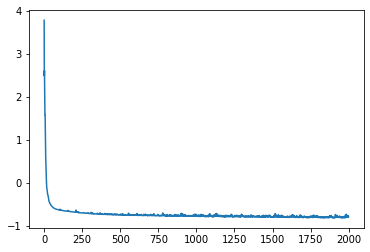

In [8]:
plt.plot(hist.history['loss'])

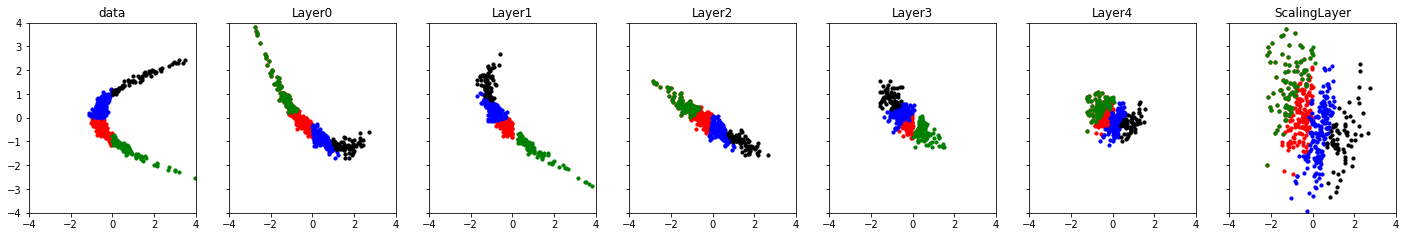

In [9]:
fig = visualize_moon(model, 500, direction='forward')

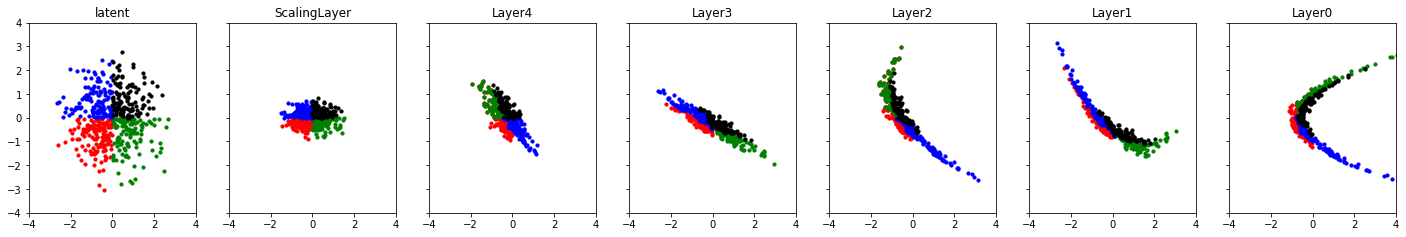

In [10]:
fig = visualize_moon(model, 500, direction='inverse')

MovieWriter imagemagick unavailable; using Pillow instead.


result/nice_moon.gif saved


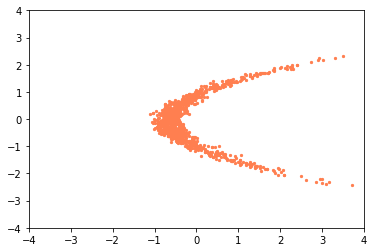

In [11]:
anim = animate_moon_gif(model, n_sample, filename='result/nice_moon.gif')
HTML(anim.to_html5_video())